Choose one of the "future questions" from project 1 (or generate a new one). It should be small - a single figure or analysis. The result of the analysis should be something like a derived data set or a figure. 
Do this step in Python (you'll need to add the appropriate lines to your Dockerfile to use python in your container). You may develop your code in Jupyter or via some other mechanism but you eventually must have a standalone python script which does the job.
Finally, integrate your new task into your make file, documenting its produces and dependencies. Finally, add the appropriate remarks in your report.Rmd (this may be as simple as referencing the generated figure. You may also load the generated data set and build the figure in your markdown file or another R task).
Grading: this is a 20 point project
10 pts for the analysis in the python code: does it do something interesting, does it work?
10 pts for the integration into the make file and the rest of the project (are the dependencies correct both for the python task and for subsequent tasks which depend on the output)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [7]:
map = gpd.read_file('goms/Gulf_of_Mexico_Shoreline.shp')

<AxesSubplot:>

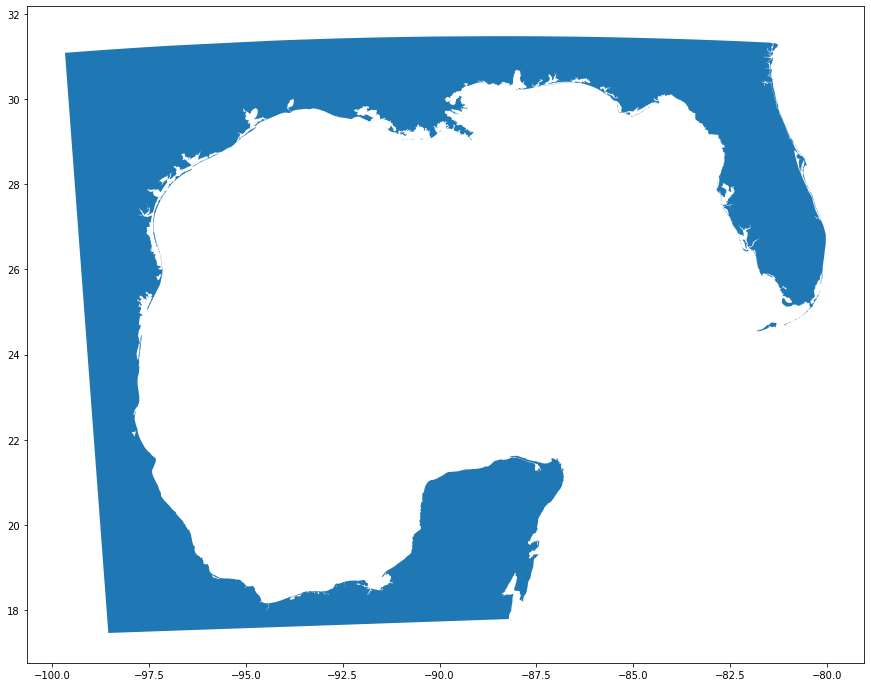

In [8]:
fig,ax = plt.subplots(figsize = (15,15))
map.plot(ax = ax)

In [11]:
# Load data set
df = pd.read_csv('data/sg.csv')

In [12]:
# Get the data in the right format for geospatial stuff (CRS or Coordinate Reference System)
crs = {'init': 'epsg:4326'}
df.head()

,tcid,year,month_mean,day_mean,hour_mean,latitude_mean,longitude_mean,windspeed_mean,sealevelpressure_mean,distance_mean,...,spp,linext.log,linext.anom,linext.roll,density.log,density.anom,density.roll,calc.log,calc.anom,calc.roll
0,3.0,1988,8.000000,27.333333,7.000000,25.516667,-78.366667,16.290741,1008.0,313722.655100,...,s,-1.024154,0.050223,-0.877644,0.239332,-0.645884,0.242133,-0.777399,-0.159935,-0.627536
1,12.0,1988,11.000000,22.800000,10.800000,27.220000,-82.640000,24.693333,995.8,398831.621940,...,s,-1.024154,0.050223,-0.877644,0.239332,-0.645884,0.242133,-0.777399,-0.159935,-0.627536
2,36.0,1990,10.000000,10.200000,10.200000,25.110000,-81.950000,20.577778,996.8,257928.490160,...,s,-0.853551,0.660565,-0.839727,0.325122,0.278787,0.282085,-0.518186,0.819023,-0.548226
3,38.0,1991,6.333333,20.111111,9.333333,26.733333,-81.111111,10.288889,1012.0,265614.162978,...,s,-0.874429,0.585871,-0.920455,0.286456,-0.137965,0.292875,-0.575364,0.603081,-0.618040
4,43.0,1991,10.000000,15.800000,10.800000,23.840000,-80.800000,20.577778,1005.6,253045.471048,...,s,-0.874429,0.585871,-0.920455,0.286456,-0.137965,0.292875,-0.575364,0.603081,-0.618040


In [13]:
# Rename latitude and longitude
df.rename(columns = {'latitude_mean':'latitude'}, inplace = True)
df.rename(columns = {'longitude_mean':'longitude'}, inplace = True)
df.head()

,tcid,year,month_mean,day_mean,hour_mean,latitude,longitude,windspeed_mean,sealevelpressure_mean,distance_mean,...,spp,linext.log,linext.anom,linext.roll,density.log,density.anom,density.roll,calc.log,calc.anom,calc.roll
0,3.0,1988,8.000000,27.333333,7.000000,25.516667,-78.366667,16.290741,1008.0,313722.655100,...,s,-1.024154,0.050223,-0.877644,0.239332,-0.645884,0.242133,-0.777399,-0.159935,-0.627536
1,12.0,1988,11.000000,22.800000,10.800000,27.220000,-82.640000,24.693333,995.8,398831.621940,...,s,-1.024154,0.050223,-0.877644,0.239332,-0.645884,0.242133,-0.777399,-0.159935,-0.627536
2,36.0,1990,10.000000,10.200000,10.200000,25.110000,-81.950000,20.577778,996.8,257928.490160,...,s,-0.853551,0.660565,-0.839727,0.325122,0.278787,0.282085,-0.518186,0.819023,-0.548226
3,38.0,1991,6.333333,20.111111,9.333333,26.733333,-81.111111,10.288889,1012.0,265614.162978,...,s,-0.874429,0.585871,-0.920455,0.286456,-0.137965,0.292875,-0.575364,0.603081,-0.618040
4,43.0,1991,10.000000,15.800000,10.800000,23.840000,-80.800000,20.577778,1005.6,253045.471048,...,s,-0.874429,0.585871,-0.920455,0.286456,-0.137965,0.292875,-0.575364,0.603081,-0.618040


In [14]:
# Time to create points (single objects that describe the longitude and latitude of a data point)
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
geometry[:3]

In [15]:
geo_df = gpd.GeoDataFrame(df, # specify our data
                         crs = crs, # specify our coordinate reference system
                         geometry = geometry) # specify the geometry list we created
geo_df.head()

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,tcid,year,month_mean,day_mean,hour_mean,latitude,longitude,windspeed_mean,sealevelpressure_mean,distance_mean,...,linext.log,linext.anom,linext.roll,density.log,density.anom,density.roll,calc.log,calc.anom,calc.roll,geometry
0,3.0,1988,8.000000,27.333333,7.000000,25.516667,-78.366667,16.290741,1008.0,313722.655100,...,-1.024154,0.050223,-0.877644,0.239332,-0.645884,0.242133,-0.777399,-0.159935,-0.627536,POINT (-78.36667 25.51667)
1,12.0,1988,11.000000,22.800000,10.800000,27.220000,-82.640000,24.693333,995.8,398831.621940,...,-1.024154,0.050223,-0.877644,0.239332,-0.645884,0.242133,-0.777399,-0.159935,-0.627536,POINT (-82.64000 27.22000)
2,36.0,1990,10.000000,10.200000,10.200000,25.110000,-81.950000,20.577778,996.8,257928.490160,...,-0.853551,0.660565,-0.839727,0.325122,0.278787,0.282085,-0.518186,0.819023,-0.548226,POINT (-81.95000 25.11000)
3,38.0,1991,6.333333,20.111111,9.333333,26.733333,-81.111111,10.288889,1012.0,265614.162978,...,-0.874429,0.585871,-0.920455,0.286456,-0.137965,0.292875,-0.575364,0.603081,-0.618040,POINT (-81.11111 26.73333)
4,43.0,1991,10.000000,15.800000,10.800000,23.840000,-80.800000,20.577778,1005.6,253045.471048,...,-0.874429,0.585871,-0.920455,0.286456,-0.137965,0.292875,-0.575364,0.603081,-0.618040,POINT (-80.80000 23.84000)


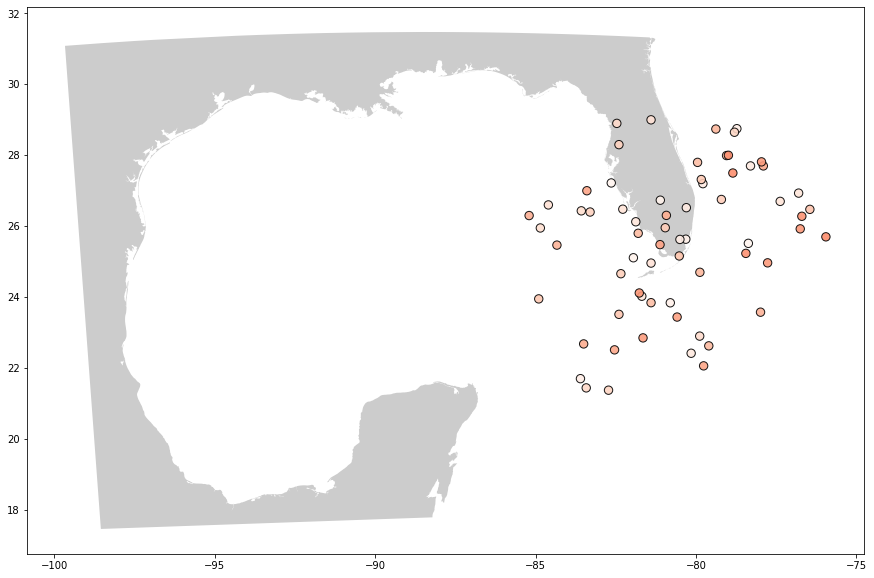

In [61]:
# From now on, GeoPandas will automatically reference the "geometry" column when we plot
# To plot, layer data onto the map from above

fig,ax = plt.subplots(figsize = (15,15))
map.plot(ax = ax, alpha = 0.4, color = "grey")
geo = geo_df.plot(ax = ax, c = df.category, cmap = 'Reds', alpha = 0.9, 
            markersize = 70, edgecolor = 'k', label = "Category")

# Save figure
plt.savefig('stormmap.png')

In [67]:
import os
os.system("jupyter nbconvert project3.ipynb --to script")

0